<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/N_N%C9%99rimanov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "N.Nərimanov" supermarketidagi savdo holati


In [30]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [31]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/N.N%C9%99rimanov.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KONFET ROT FRONT ANTOSKA-KARTOSKA KG,Shirinliklar,8.45,2019-01-07,True
1,DR.NATURI 90GR ZDOROV.MENYU XLEBCI MULTIZLAK N10,Diabet mahsulotlari,0.95,2019-01-07,True
2,YASHKINO 350GR KREKER ZOLOTAYA RIBKA,Shirinliklar,1.30,2019-01-07,True
3,LEZZET-AA 250GR PECENYE KAKAOLU,Shirinliklar,0.90,2019-07-05,False
4,EZEL PREMIUM 500ML QABYUYAN MAYE ALMA,Idish yuvish vositalari,1.55,2019-07-05,False
5,RED BULL 4X250ML ENERGY DRINK PACK,Energetik ichimliklar,10.85,2019-07-05,False
6,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Maishiy buyumlar,2.92,2019-07-05,False
7,MOLPROEKT 900GR QATILASDIRILMIS SUD 8.5% PL/Q,Quyultirilgan sut,2.95,2019-07-05,False
8,SNICKERS 87GR EXTRA KARAMEL,Shirinliklar,1.40,2019-07-05,False
9,GEZEN CORAB 7,Paypoq,4.95,2019-07-05,False


In [32]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21258 entries, 0 to 21257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21258 non-null  object 
 1   mahsulot_turi   21258 non-null  object 
 2   mahsulot_narhi  21258 non-null  float64
 3   sotilgan_vaqti  21258 non-null  object 
 4   bonus_karta     21258 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 685.2+ KB


In [33]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [34]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21258 entries, 0 to 21257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21258 non-null  object        
 1   mahsulot_turi   21258 non-null  object        
 2   mahsulot_narhi  21258 non-null  float64       
 3   sotilgan_vaqti  21258 non-null  datetime64[ns]
 4   bonus_karta     21258 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 685.2+ KB


In [35]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2269
2001
2213
2136
2096
2052
1851
2212
2110
2313
5
0


In [36]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2269
2001
2213
2136
2096
2052
1851
2212
2110
2313
0
0


In [37]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KONFET ROT FRONT ANTOSKA-KARTOSKA KG,Shirinliklar,8.45,2019-01-07,True
1,DR.NATURI 90GR ZDOROV.MENYU XLEBCI MULTIZLAK N10,Diabet mahsulotlari,0.95,2019-01-07,True
2,YASHKINO 350GR KREKER ZOLOTAYA RIBKA,Shirinliklar,1.30,2019-01-07,True
3,LEZZET-AA 250GR PECENYE KAKAOLU,Shirinliklar,0.90,2019-07-05,False
4,EZEL PREMIUM 500ML QABYUYAN MAYE ALMA,Idish yuvish vositalari,1.55,2019-07-05,False
...,...,...,...,...,...
21253,DONDURMA MAGNUM 6x57.5ML MINI CLASSIC BADEM BEYAZ,Muzqaymoq,11.10,2019-03-15,False
21254,EV XOREKLERI 330GR KOTLET TOYUQ ET ILE,Konservalar,2.50,2019-03-15,False
21255,ILGIM 5GR EDV.VANIL,Ziravorlar,0.07,2019-03-15,False
21256,"BADAGONI 0,75LT PIROSMANI KEMTURS QIRM.SERAB 2009",Vinolar,16.40,2019-03-15,False


In [38]:
#9 2019-yilda "N.Nərimanov" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4879
Maishiy buyumlar,1152
"Yuvish vositalari, tozalagichlar",1042
Mevali sharbatlar,987
Idish-tovoq,805
...,...
Kefir,14
Tayyor ovqatlar,13
Muzlatilgan mahsulotlar,8
Shampan,8


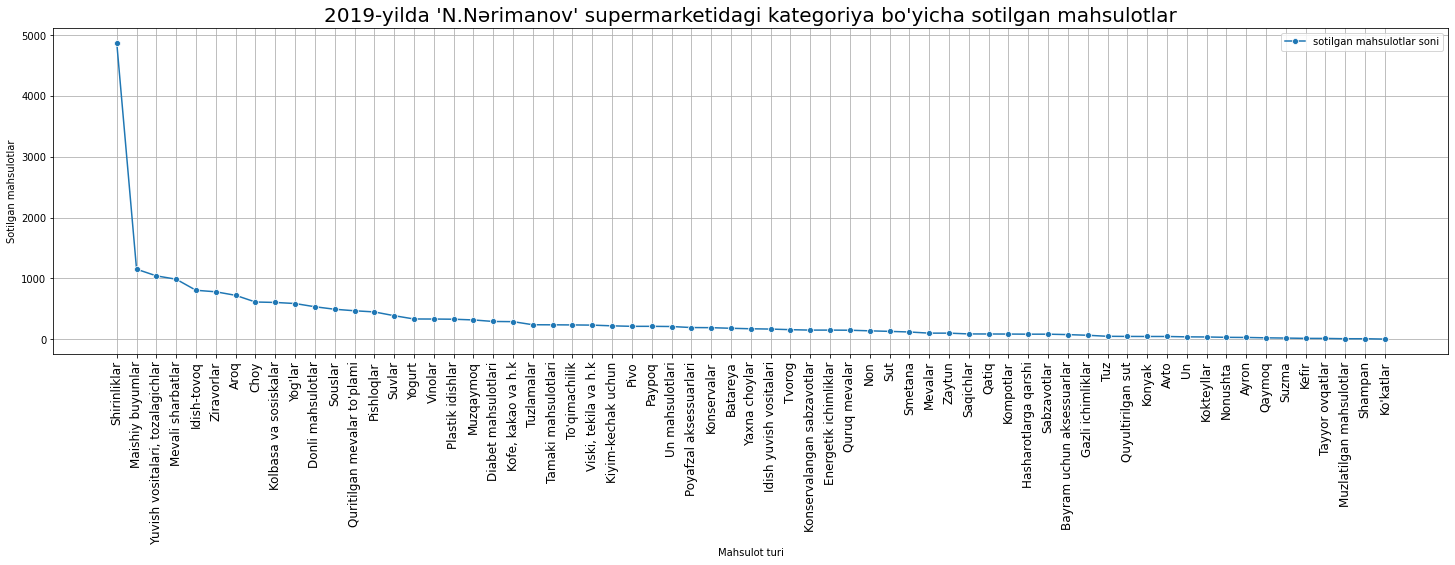

In [39]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'N.Nərimanov' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [40]:
#10 2019-yilda "N.Nərimanov" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10803.73
Avto,223.13
Ayron,22.60
Batareya,822.10
Bayram uchun aksessuarlar,218.54
...,...
Yog'lar,5492.64
Yogurt,415.77


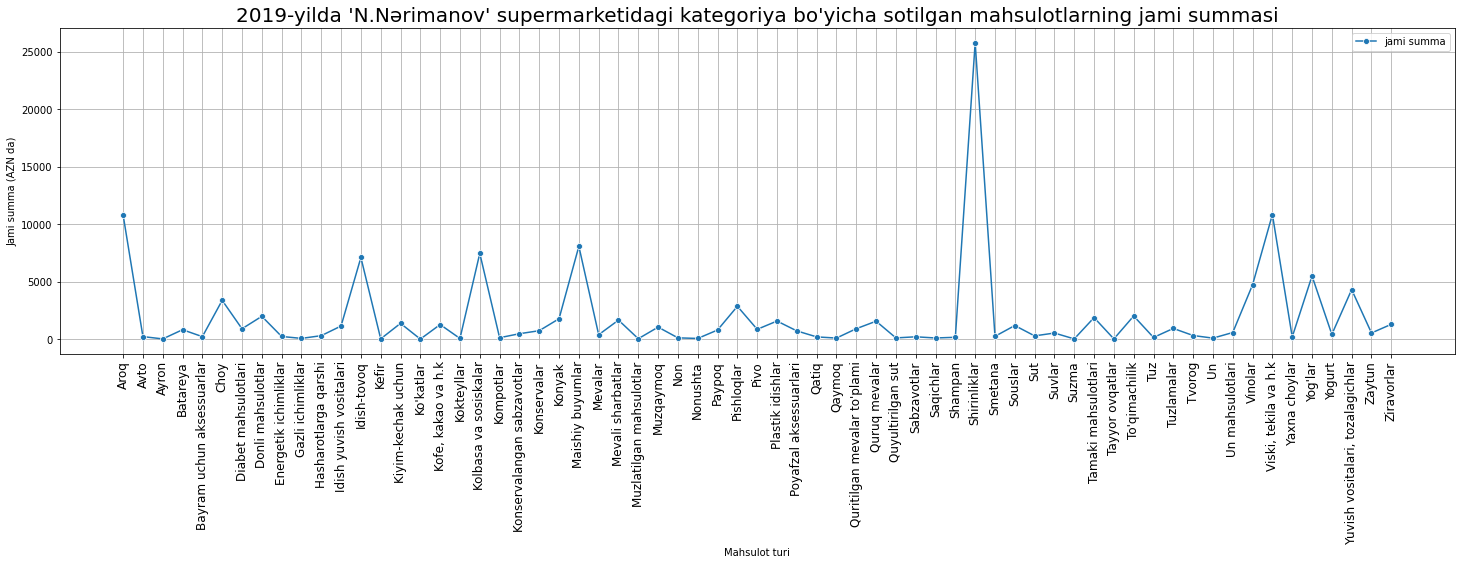

In [41]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'N.Nərimanov' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [42]:
#11 2019-yilda "N.Nərimanov" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10669,10584


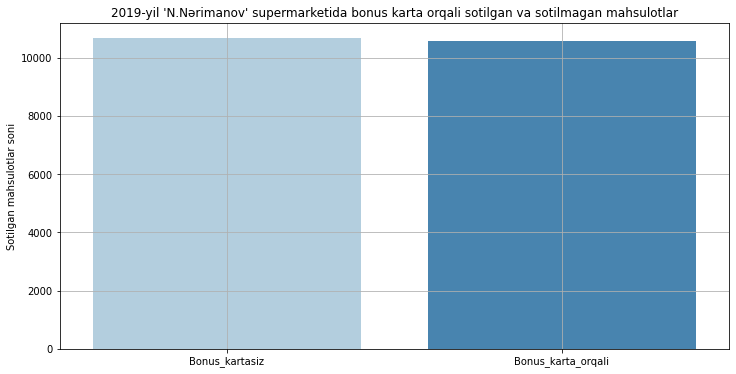

In [43]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'N.Nərimanov' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [44]:
#12 2019-yilda "N.Nərimanov" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2269
Fevral,2001
Mart,2213
Aprel,2136
May,2096
Iyun,2052
Iyul,1851
Avgust,2212
Sentabr,2110
Oktabr,2313


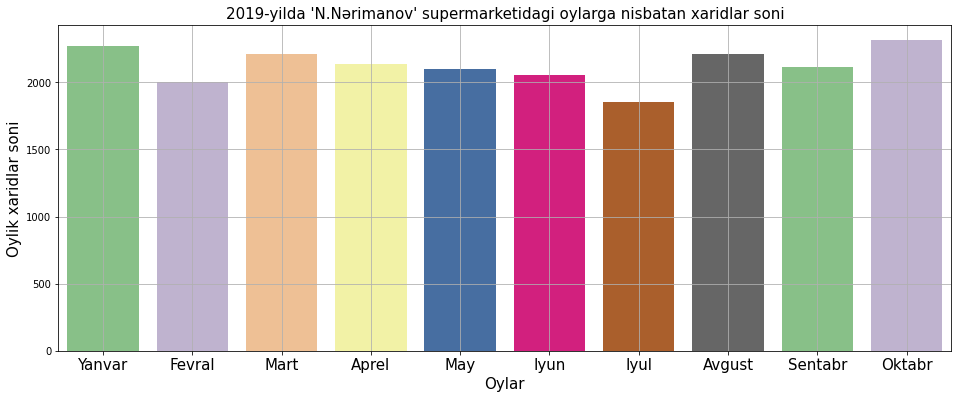

In [45]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'N.Nərimanov' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [46]:
#13 2019-yilda "N.Nərimanov" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2911
Seshanba,3237
Chorshanba,2965
Payshanba,2991
Juma,3270
Shanba,2968
Yakshanba,2911


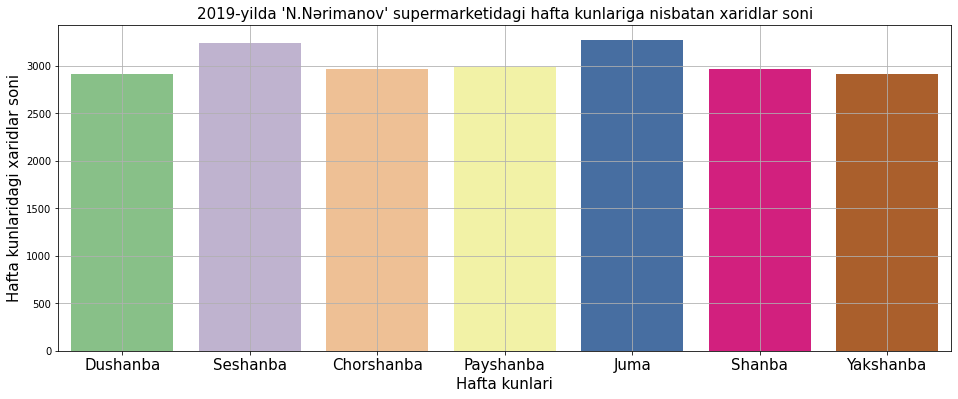

In [47]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'N.Nərimanov' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [48]:
#14 2019-yilda "N.Nərimanov" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,747
2,651
3,619
4,633
5,691
6,668
7,800
8,688
9,847
10,561


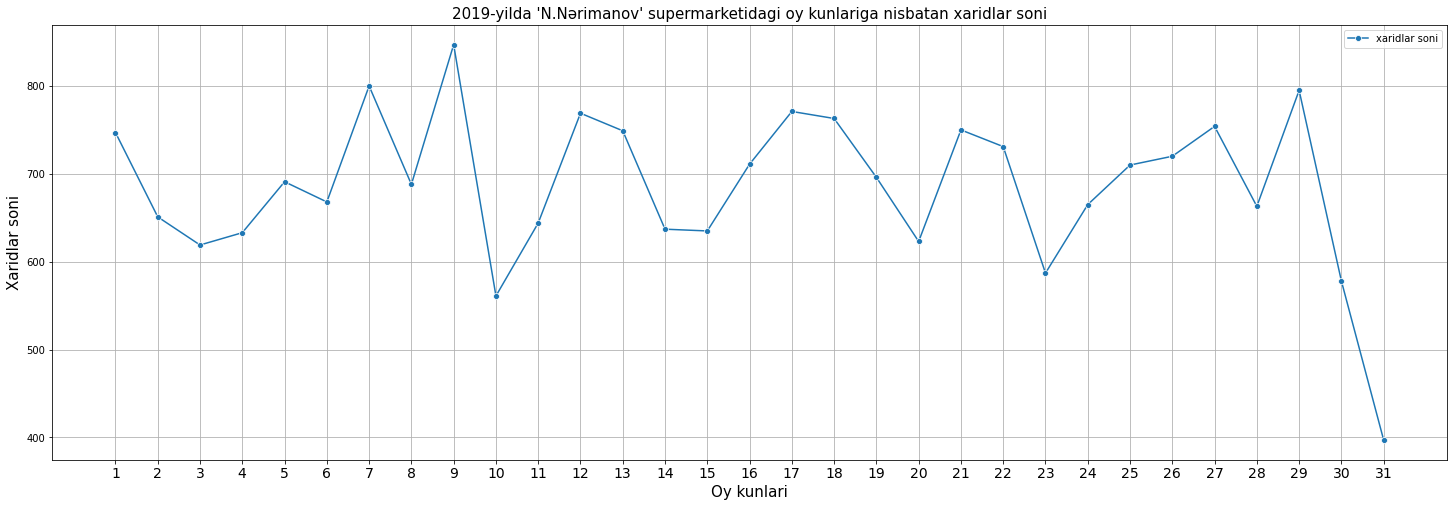

In [49]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'N.Nərimanov' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [50]:
#15 2019-yil 'N.Nərimanov' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [51]:
len(oy_sanalari)

310

In [52]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [53]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [54]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,67,93,62,126,81,64,41,85,68,68,63,73,63,70,97,67,80,98,72,49,78,77,59,59,81,40,107,67,77,77,60
Fevral,80,39,28,80,64,57,108,38,49,75,77,65,62,85,96,86,113,65,75,102,96,69,91,70,56,52,60,63,0,0,0
Mart,55,99,63,98,97,60,92,74,57,65,56,89,24,37,70,87,60,80,98,37,56,53,82,68,62,77,67,64,155,97,34
Aprel,98,81,75,82,81,80,107,54,133,79,45,43,56,57,33,32,84,61,81,61,51,84,50,63,91,83,60,92,80,59,0
May,58,18,61,51,55,65,73,78,95,50,95,83,47,78,68,67,71,86,75,63,30,57,46,63,57,72,146,63,86,70,69
Iyun,79,59,65,51,74,41,64,43,68,32,65,84,120,57,52,75,76,71,66,56,63,87,84,51,56,78,78,116,79,62,0
Iyul,44,56,46,36,94,71,95,82,102,41,25,87,55,33,36,58,65,70,53,78,57,52,40,45,74,41,36,61,74,41,103
Avgust,87,72,73,43,7,69,72,105,78,47,59,74,138,80,46,90,96,75,51,58,115,55,59,75,77,98,61,39,78,52,83
Sentabr,77,57,80,31,62,105,55,52,57,46,52,105,99,58,53,94,78,43,53,62,94,113,43,105,84,109,90,24,70,59,0
Oktabr,102,77,66,35,76,56,93,77,140,58,107,66,85,82,84,55,48,114,72,57,110,84,33,66,72,70,49,74,96,61,48


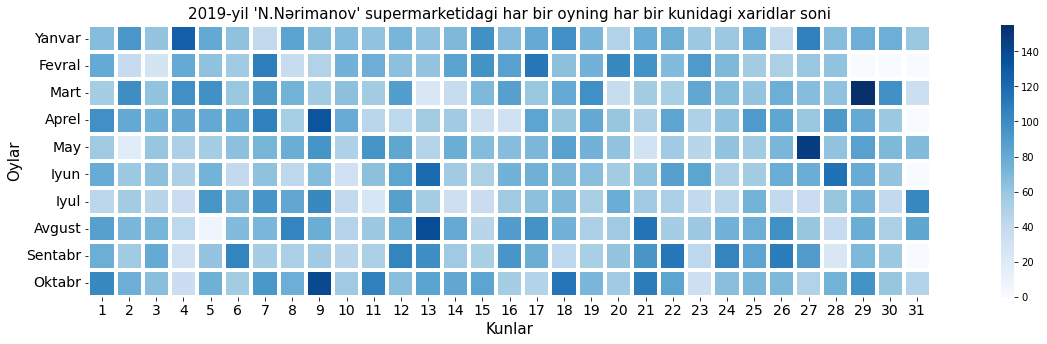

In [55]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'N.Nərimanov' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

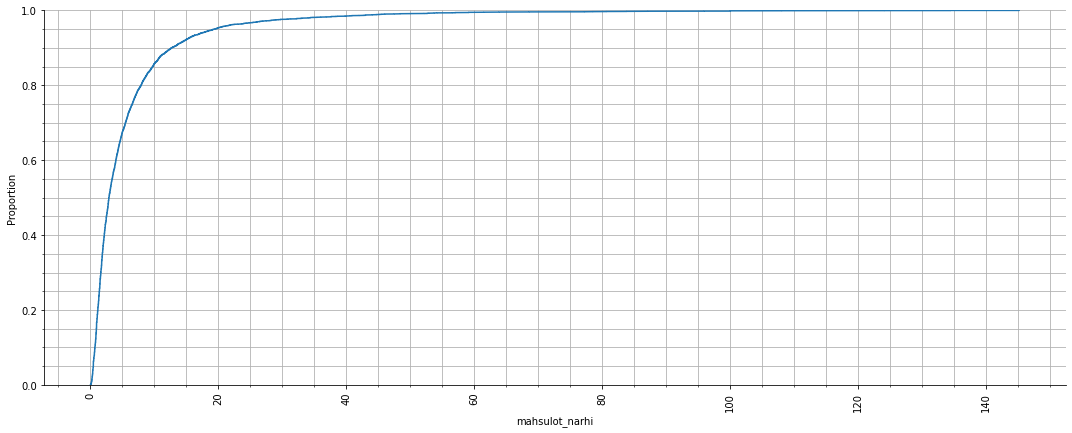

In [56]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 14 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()